In [2]:
import requests
import pandas as pd

# Make a GET request to the URL
response = requests.get('https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD')

# Save the response object to a file
with open('data.csv', 'wb') as f:
    f.write(response.content)

In [33]:
import pandas as pd

# reading the dataset
df = pd.read_csv('data.csv')

# checking random 5 rows
df.sample(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
23981,7SAXCDE5XN,King,Normandy Park,WA,98166.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33.0,203852372,POINT (-122.34118 47.46665),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
15877,5YJ3E1EA7M,King,Sammamish,WA,98075.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41.0,138289749,POINT (-122.03539 47.61344),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
13374,WBA5P9C0XM,King,Bothell,WA,98011.0,2021,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,1.0,177595722,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
3798,5YJSA1S1XE,King,Seattle,WA,98117.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,36.0,204582388,POINT (-122.38418 47.70044),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
8779,YV4BR0DL8N,King,Seattle,WA,98199.0,2022,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18,0,36.0,186781626,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


### Get all the cars and their types that do not qualify for clean alternative fuel vehicle


In [6]:
# finding the unique values
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [11]:
df_filtered = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible']
df_filtered.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
6,3FA6P0PU1G,Thurston,Tumwater,WA,98501.0,2016,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,22.0,347508836,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
7,WA1F2AFY8P,Thurston,Lacey,WA,98516.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,227213871,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
8,1FADP5CU0E,Thurston,Rochester,WA,98579.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,20.0,229811151,POINT (-123.08743 46.82175),PUGET SOUND ENERGY INC,5.306701e+10
11,7SAYGDEF4N,Yakima,Yakima,WA,98908.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,187486883,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
14,1FADP5FU4H,Thurston,Lacey,WA,98513.0,2017,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,22.0,139887513,POINT (-122.81754499999994 46.98876000000007),PUGET SOUND ENERGY INC,5.306701e+10


### Get all TESLA cars with the model year, and model type made in Bothell City.

In [12]:
df['Make'].unique()

array(['TESLA', 'HONDA', 'NISSAN', 'FORD', 'AUDI', 'KIA', 'CHEVROLET',
       'SMART', 'BMW', 'TOYOTA', 'JEEP', 'FIAT', 'VOLVO', 'CHRYSLER',
       'LEXUS', 'PORSCHE', 'CADILLAC', 'HYUNDAI', 'MERCEDES-BENZ',
       'RIVIAN', 'VOLKSWAGEN', 'JAGUAR', 'LINCOLN', 'MITSUBISHI', 'MINI',
       'POLESTAR', 'GENESIS', 'SUBARU', 'LUCID', 'TH!NK', 'LAND ROVER',
       'FISKER', 'AZURE DYNAMICS', 'WHEEGO ELECTRIC CARS', 'BENTLEY'],
      dtype=object)

In [19]:
df[(df['Make']=='TESLA') & (df['City']=='Bothell')][['City', 'Model Year', 'Make', 'Model']]

,City,Model Year,Make,Model
39,Bothell,2020,TESLA,MODEL 3
217,Bothell,2022,TESLA,MODEL 3
218,Bothell,2022,TESLA,MODEL Y
222,Bothell,2018,TESLA,MODEL 3
292,Bothell,2017,TESLA,MODEL X
...,...,...,...,...
129778,Bothell,2019,TESLA,MODEL 3
129954,Bothell,2021,TESLA,MODEL 3
129976,Bothell,2014,TESLA,MODEL S
130295,Bothell,2022,TESLA,MODEL 3


### Get all the cars that have an electric range of more than 100, and were made after 2015

In [22]:
df['Model Year'].dtype

dtype('int64')

In [36]:
# changing the dtype 
df['Model Year'] = pd.to_datetime(df['Model Year'], format='%Y').dt.year
df['Model Year'].head()

0    2018
1    2021
2    2019
3    2013
4    2017
Name: Model Year, dtype: int32

In [39]:
df[(df['Electric Range']>100) & (df['Model Year']>2015)]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130417,5YJYGDEE5L,Pierce,Tacoma,WA,98444.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,29.0,112591538,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


### Draw plots to show the distribution between city and electric vehicle type

In [45]:
# Draw plots to show the distribution between city and electric vehicle type
df.groupby('City')['Electric Vehicle Type'].count()

City
Aberdeen          115
Acme                7
Addy                2
Aiea                1
Airway Heights     18
                 ... 
Yacolt             32
Yakima            471
Yarrow Point      126
Yelm              197
Zillah             23
Name: Electric Vehicle Type, Length: 656, dtype: int64

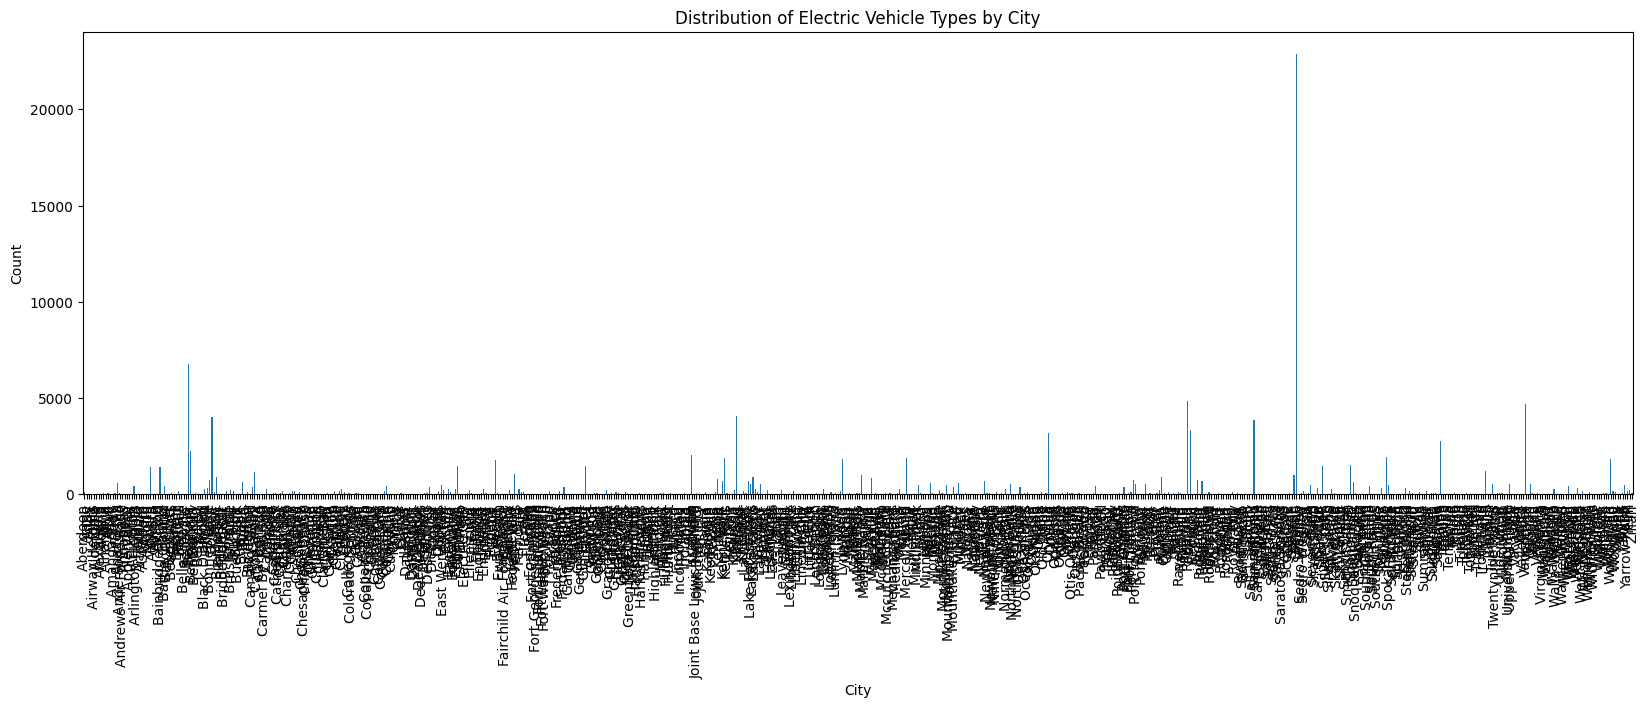

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
city_vehicle_counts = df.groupby('City')['Electric Vehicle Type'].count()

# Set the figure size
fig, ax = plt.subplots(figsize=(20, 6))

# Plot the distribution using a bar plot
city_vehicle_counts.plot(kind='bar', ax=ax)

# Set labels and title
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')

# Show the plot
plt.show()


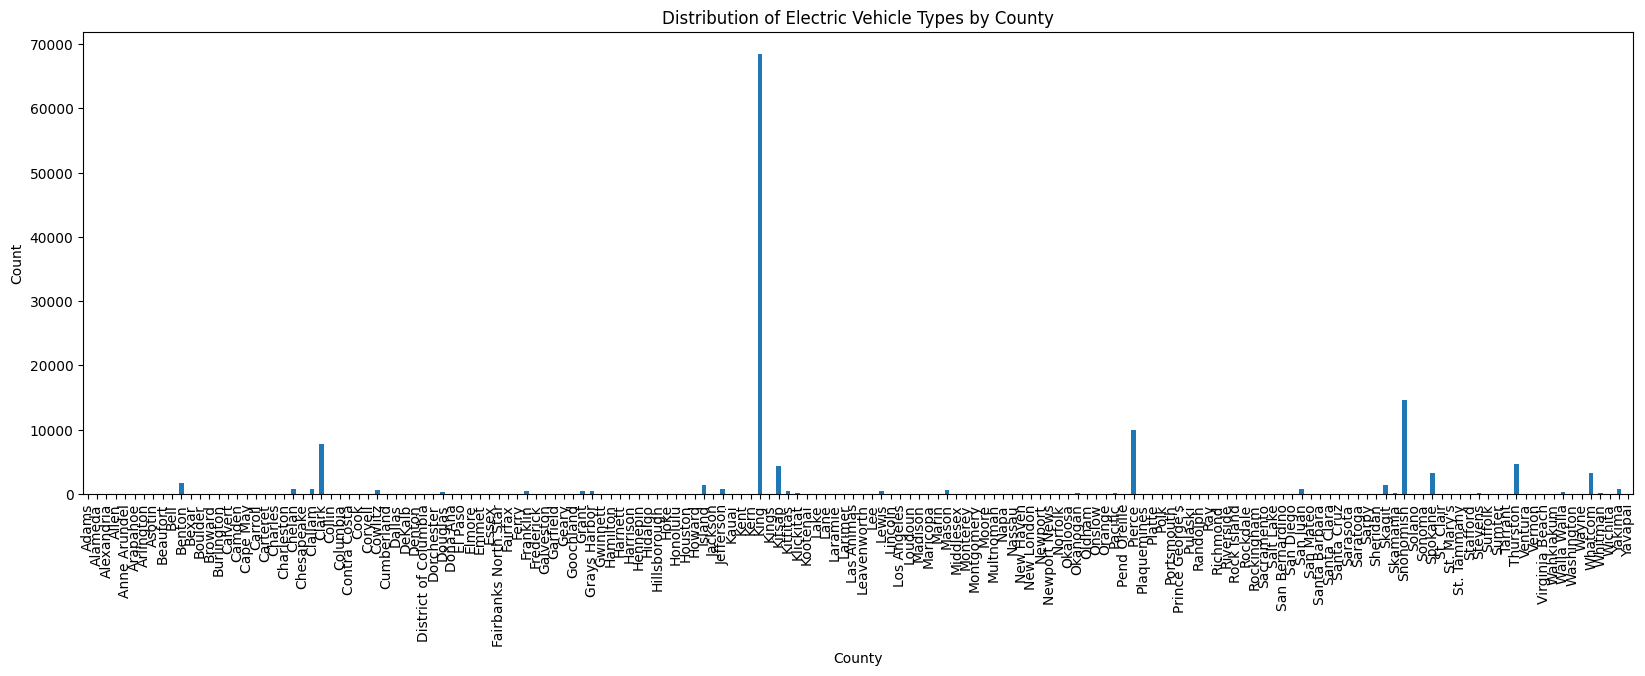

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
city_vehicle_counts = df.groupby('County')['Electric Vehicle Type'].count()

# Set the figure size
fig, ax = plt.subplots(figsize=(20, 6))

# Plot the distribution using a bar plot
city_vehicle_counts.plot(kind='bar', ax=ax)

# Set labels and title
plt.xlabel('County')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by County')

# Show the plot
plt.show()

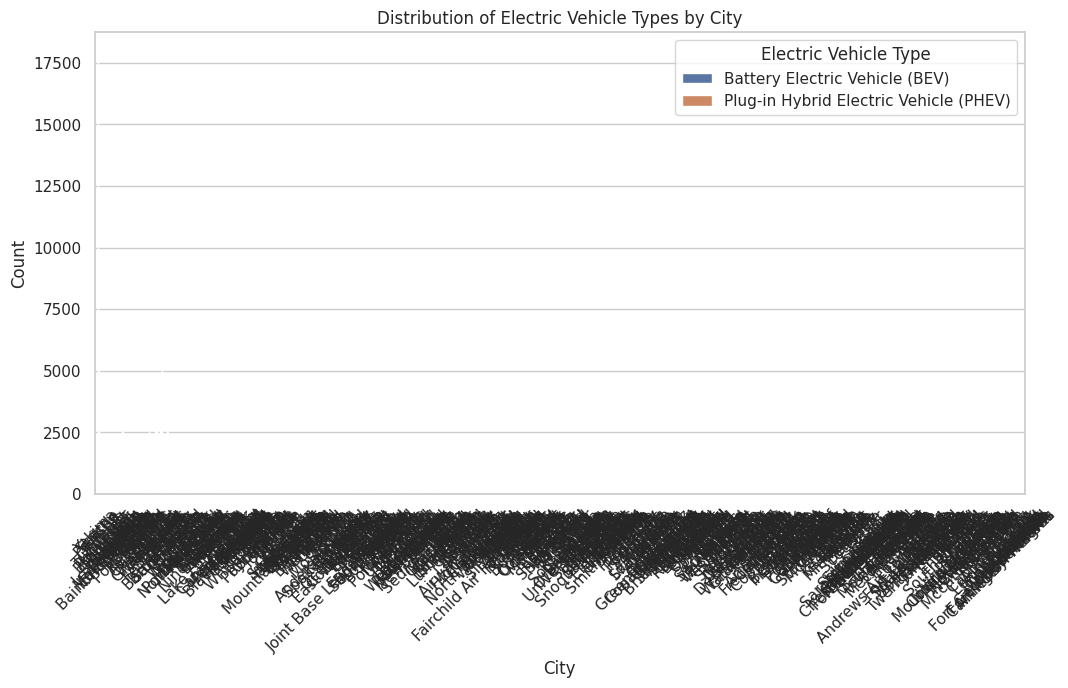

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
sns.set(style="whitegrid")

# Plot the distribution using a count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='City', hue='Electric Vehicle Type', data=df)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')

# Show the plot
plt.show()
